<a href="https://colab.research.google.com/github/drscghosh/Testing/blob/master/Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install lifelines

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test


In [5]:
# ---------------------------
# Step 1: Create Sample Dataset
# ---------------------------
np.random.seed(42)
n = 100

data = pd.DataFrame({
    'duration': np.random.exponential(10, size=n),  # time to event or censor
    'event': np.random.binomial(1, 0.7, size=n),     # 1 if event occurred, 0 if censored
    'age': np.random.randint(30, 80, size=n),
    'group': np.random.choice(['A', 'B'], size=n)
})

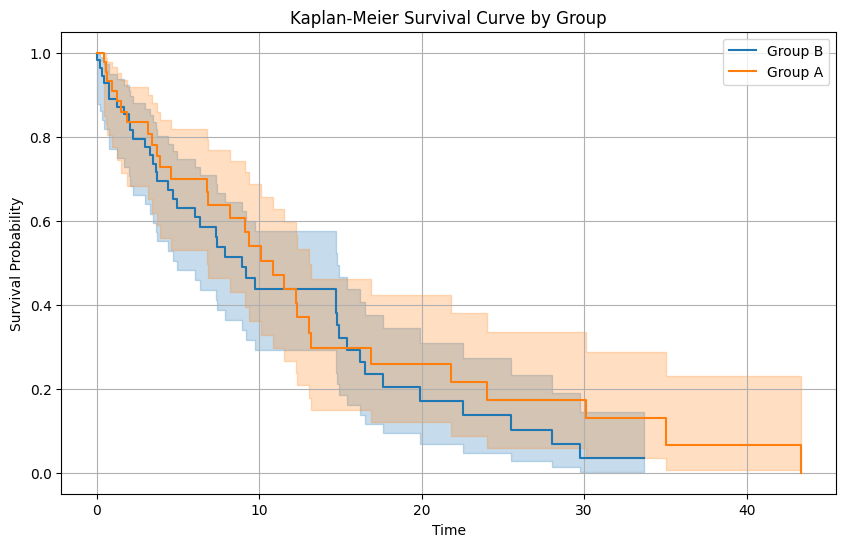

In [6]:
# ---------------------------
# Step 2: Kaplan-Meier Estimator
# ---------------------------
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
for label in data['group'].unique():
    group_data = data[data['group'] == label]
    kmf.fit(group_data['duration'], event_observed=group_data['event'], label=f"Group {label}")
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve by Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

In [7]:
# ---------------------------
# Step 3: Log-rank test between groups
# ---------------------------
group_A = data[data['group'] == 'A']
group_B = data[data['group'] == 'B']

results = logrank_test(
    group_A['duration'], group_B['duration'],
    event_observed_A=group_A['event'],
    event_observed_B=group_B['event']
)
print("Log-rank test p-value:", results.p_value)

Log-rank test p-value: 0.41764095828492254


<lifelines.CoxPHFitter: fitted with 100 total observations, 30 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 70
   partial log-likelihood = -250.50
         time fit was run = 2025-05-24 11:05:51 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
age         0.00      1.00      0.01           -0.02            0.02                0.98                1.02
group_code  0.20      1.22      0.25           -0.29            0.69                0.75                1.99

            cmp to    z    p  -log2(p)
covariate                             
age           0.00 0.13 0.89      0.16
group_code    0.00 0.80 0.42      1.24
---
Concordance = 0.54
Partial AIC = 505.00
log-likelihood ratio test = 0.68 on 2 df
-log2(p) of ll-ratio test = 0.49

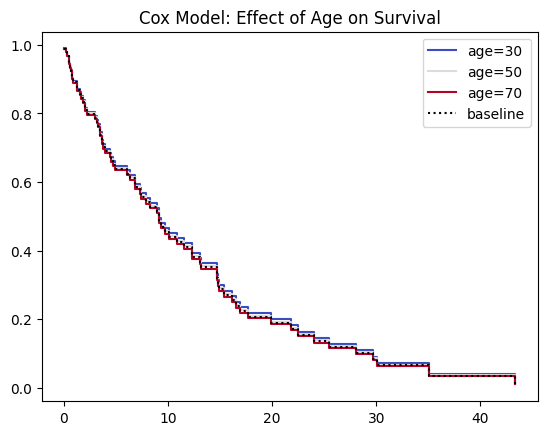

In [8]:
# ---------------------------
# Step 4: Cox Proportional Hazards Model
# ---------------------------
# Convert group to categorical numeric
data['group_code'] = data['group'].map({'A': 0, 'B': 1})

# Fit Cox model
cph = CoxPHFitter()
cph.fit(data[['duration', 'event', 'age', 'group_code']], duration_col='duration', event_col='event')
cph.print_summary()

# Optional: plot partial effects
cph.plot_partial_effects_on_outcome(covariates='age', values=[30, 50, 70], cmap='coolwarm')
plt.title('Cox Model: Effect of Age on Survival')
plt.show()